In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Profiling on DE1

<IPython.core.display.Javascript object>


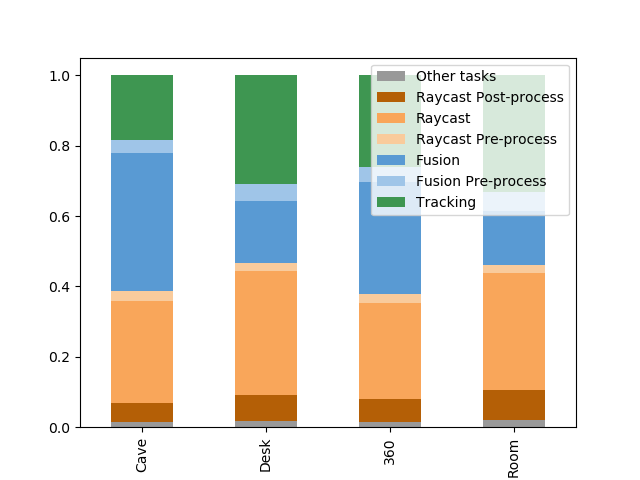

In [2]:
data = [[0.1829293273, 0.03943050877, 0.3913126704, 0.02749763707, 0.2911512145, 0.0535051339],
        [0.3101047418, 0.04820650761, 0.1763168303, 0.02196163201, 0.3519928071, 0.07290274641],
        [0.2611887589, 0.04315612874, 0.3180770147, 0.024394196, 0.2729345963, 0.0644117921],
        [0.3326510183, 0.05282654339, 0.1537581138, 0.02311017268, 0.3318868456, 0.08457786648]]

data = np.c_[data, 1-np.sum(data, axis=1)]

modules = ["Tracking", "Fusion Pre-process", "Fusion", "Raycast Pre-process", "Raycast", "Raycast Post-process", "Other tasks"]
benchmarks = ["Cave", "Desk", "360", "Room"]

df = pd.DataFrame(data, columns=modules, index=benchmarks)

df = df[list(reversed(modules))]

colors = reversed(["#3e9651", "#9fc5e8", "#599ad3", "#f9cb9c", "#f9a65a", "#b45f06", "#999999"])

ax = df.plot.bar(stacked=True, color=colors)

In [3]:
## In average
df.mean()[['Raycast', 'Fusion', 'Tracking']].sum()

0.84357598475000006

# DE5 Performance

              x64 RaycastO3  x64 Combined  DE5 Best (ICP+DF+RC)  \
Algorithm                                                         
Depth Fusion     141.585617           NaN            294.795762   
Raycast          119.895986           NaN            183.499267   
Combined                NaN     64.033959                   NaN   
ICP              107.990775    128.358663           1079.893387   
Total             32.072875     35.795938              6.129144   

              DE5 Best (ICP+Combined)  DE5 Best (indiv.)  
Algorithm                                                 
Depth Fusion                      NaN         283.145348  
Raycast                           NaN         207.273958  
Combined                   163.269637         238.588804  
ICP                        427.091151        1130.195793  
Total                        6.781784          49.112762  


<IPython.core.display.Javascript object>


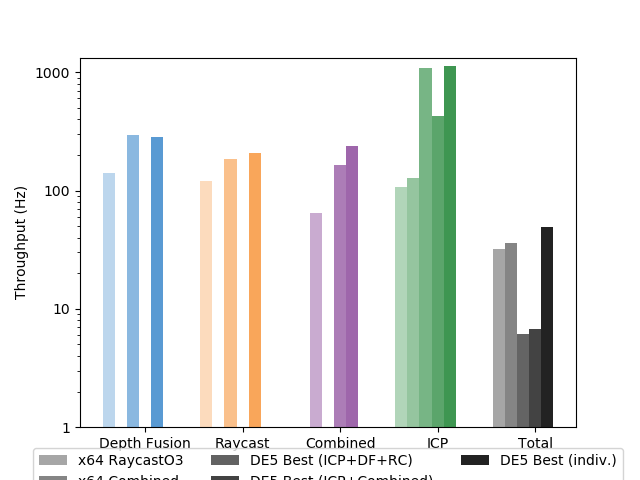

In [12]:
df = pd.read_csv('DE5_DE1.csv', index_col='Algorithm')

df = df.drop('DE1 Best (indiv.)', axis=1)

print(df)

my_colors = ['#cccccc', '#aaaaaa', '#888888', '#666666', '#444444', '#222222'] + ['r']*50

# ax = df.plot.bar(logy=True, color = my_colors)

# df['CPU RaycastO3']

ind = np.arange(df.shape[0])
width = 1/(df.shape[0]+3)

# Set the colors
colors = ['#599ad3', '#f9a65a', '#9e66ab', '#3e9651', '#222222']

# make the plots
fig, ax = plt.subplots()
bars = []
for i,col in enumerate(df):
    bars.append(ax.bar(ind + width*i, df[col], width, color = colors, alpha=0.4+i*(1-0.4)/(df.shape[1]-1), log=True))

ax.set_xticks(ind + width*(df.shape[0]+1)/2)  # position axis ticks
ax.set_xticklabels(df.index)  # set them to the names
ax.set_ylim(ymin=1)
ax.set_ylabel("Throughput (Hz)")
ax.legend([b[-1] for b in bars], list(df), loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.2))

ax.yaxis.set_major_formatter(ScalarFormatter())

plt.show()
